In [16]:
# # Clone YOLOv5 repository
# !git clone https://github.com/ultralytics/yolov5
# %cd yolov5

# # Install dependencies
# !pip install -r requirements.txt

# # Install PyTorch with MPS backend (for macOS M1)
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


In [2]:
import torch
print("MPS Available:", torch.backends.mps.is_available())

MPS Available: True


In [24]:
import yaml

with open("../data.yaml", 'r') as file:
    data_config = yaml.safe_load(file)

print("Number of classes:", data_config["nc"])
print("Class names:", data_config["names"])
print("Train images path:", data_config["train"])
print("Validation images path:", data_config["val"])
print("Test images path:", data_config["test"])


Number of classes: 3
Class names: ['ates', 'buyuk duman', 'duman']
Train images path: train/images
Validation images path: test/images
Test images path: test/images


In [25]:
import os

splits = ["train", "test"]  # You don't have 'valid' — so we skip it
for split in splits:
    image_dir = f"../{split}/images"
    count = len([f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))])
    print(f"{split.capitalize()} set has {count} images.")


Train set has 538 images.
Test set has 145 images.


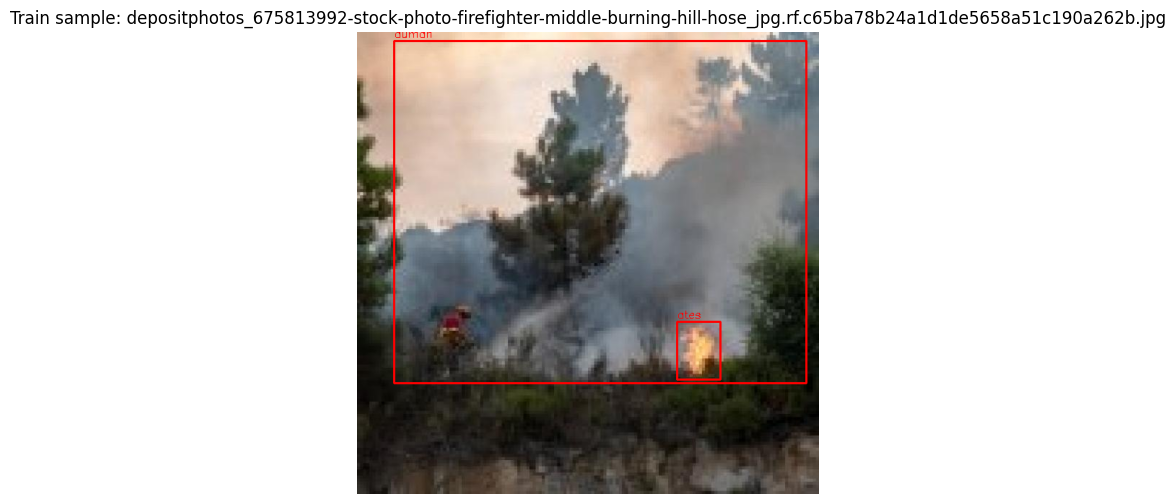

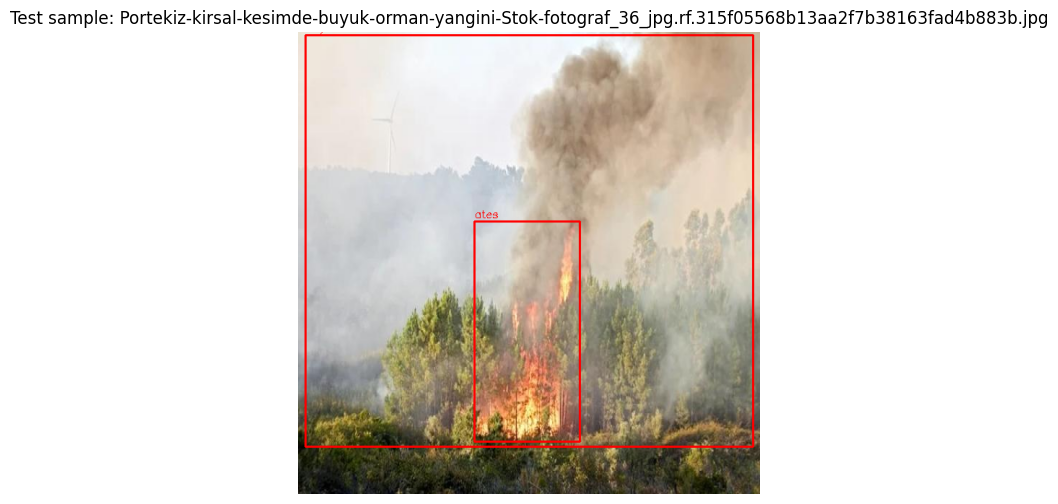

In [28]:
import cv2
import matplotlib.pyplot as plt

# Helper to load YOLO labels
def load_yolo_labels(label_path):
    with open(label_path, 'r') as f:
        labels = [list(map(float, line.strip().split())) for line in f]
    return labels

# Display one sample per split
for split in splits:
    img_dir = f"../{split}/images"
    lbl_dir = f"../{split}/labels"
    
    sample_img = os.listdir(img_dir)[0]
    img_path = os.path.join(img_dir, sample_img)
    lbl_path = os.path.join(lbl_dir, sample_img.replace(".jpg", ".txt").replace(".png", ".txt"))

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape
    labels = load_yolo_labels(lbl_path)

    for label in labels:
        cls, cx, cy, bw, bh = label
        x1 = int((cx - bw/2) * w)
        y1 = int((cy - bh/2) * h)
        x2 = int((cx + bw/2) * w)
        y2 = int((cy + bh/2) * h)
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img, data_config["names"][int(cls)], (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    plt.figure(figsize=(6,6))
    plt.title(f"{split.capitalize()} sample: {sample_img}")
    plt.imshow(img)
    plt.axis("off")
    plt.show()


In [29]:
from collections import Counter
import glob

label_files = glob.glob("train/labels/*.txt")
counter = Counter()

for file in label_files:
    with open(file, 'r') as f:
        for line in f:
            cls_id = int(line.strip().split()[0])
            counter[cls_id] += 1

# Map class indices to names
for cls_id, count in counter.items():
    print(f"{data_config['names'][cls_id]}: {count} objects")
